# GRIP - THE SPARKS FOUNDATION

 <font size="5">DATA SCIENCE AND BUSINESS ANALYTICS INTERN</font>

# <font size="4">MEERA HARIKRISHNAN</font>

# <font size="4">TASK 2 - PREDICTION USING UNSUPERVISED MACHINE LEARNING</font>

In this task we need to predict the optimum number of clusters from the given 'Iris' dataset consists of 50 samples from each of three species of Iris(Iris setosa,Iris virginia,Iris versicolor) and represent it visually.

# <font size="3">Importing the libraries required</font>

In [1]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# <font size="3">Importing the dataset</font>

In [3]:
# Load the iris dataset

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head(10) 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


Here we can see the first 10 values from the dataset.

# <font size="3">To find the optimum number of clusters for KMeans and to determine the value of K</font>

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


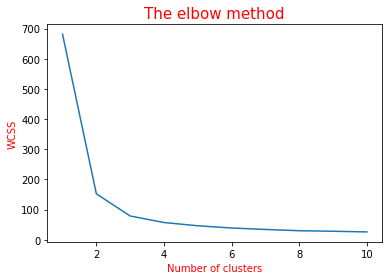

In [7]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph

plt.plot(range(1, 11), wcss)
plt.title('The elbow method',color = 'red',fontsize=15)
plt.xlabel('Number of clusters', color='red',fontsize=10)
plt.ylabel('WCSS',color='red',fontsize=10) # Within cluster sum of squares
plt.show()    

This is done by using Elbow method.Here we plotted a graph to view elbow bend to determine the number of clusters.The optimum number of clusters is where the elbow occurs.This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

In [8]:
# Applying kmeans to the dataset / Creating the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

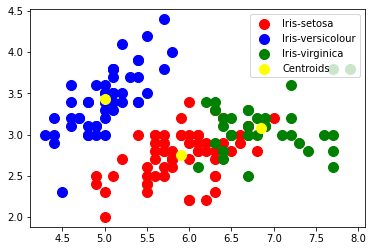

In [10]:
# Visualising the clusters - On the first two columns

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc='upper right')

This is KMeans Clustering.